In [1]:
#import libraries and packages
import numpy as np
import pandas as pd


In [2]:
dataset = pd.read_csv("SMSSpamCollection", sep = '\t',names= ['label', 'message'])

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [4]:
dataset.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [5]:
dataset['label'] = dataset['label'].map({'ham':0, 'spam':1})

In [6]:
dataset

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

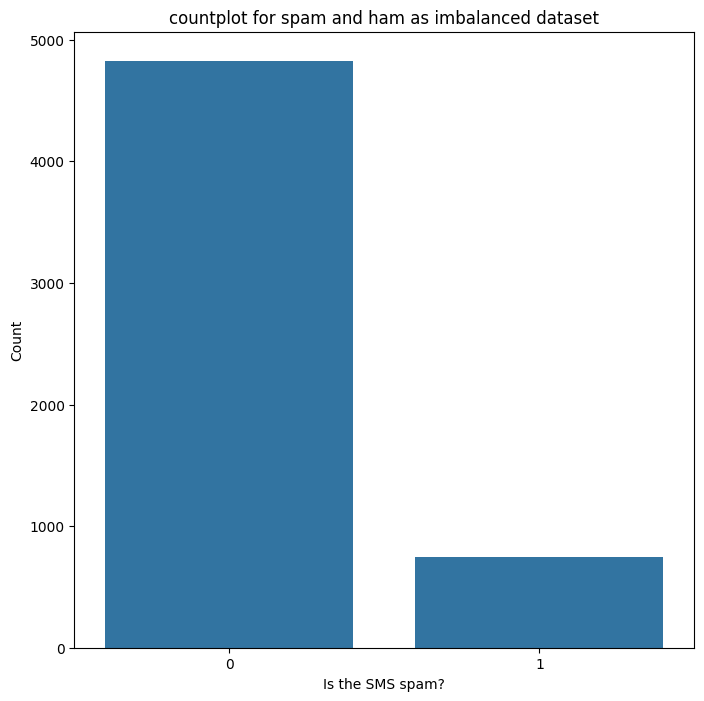

In [8]:
#countplot for spam and ham as imbalanced dataset 
plt.figure(figsize = (8,8))
g = sns.countplot(x = "label", data = dataset)
p = plt.title('countplot for spam and ham as imbalanced dataset')
p = plt.xlabel('Is the SMS spam?')
p = plt.ylabel('Count')

In [9]:
#Handling imbalanced dataset using oversampling 
only_spam = dataset[dataset["label"] == 1]
print(len(only_spam))

747


In [10]:
count = int((dataset.shape[0]- only_spam.shape[0])/only_spam.shape[0])

In [ ]:
count 

In [11]:
for i in range(0,count-1):
    dataset = pd.concat([dataset, only_spam])
dataset.shape

(9307, 2)

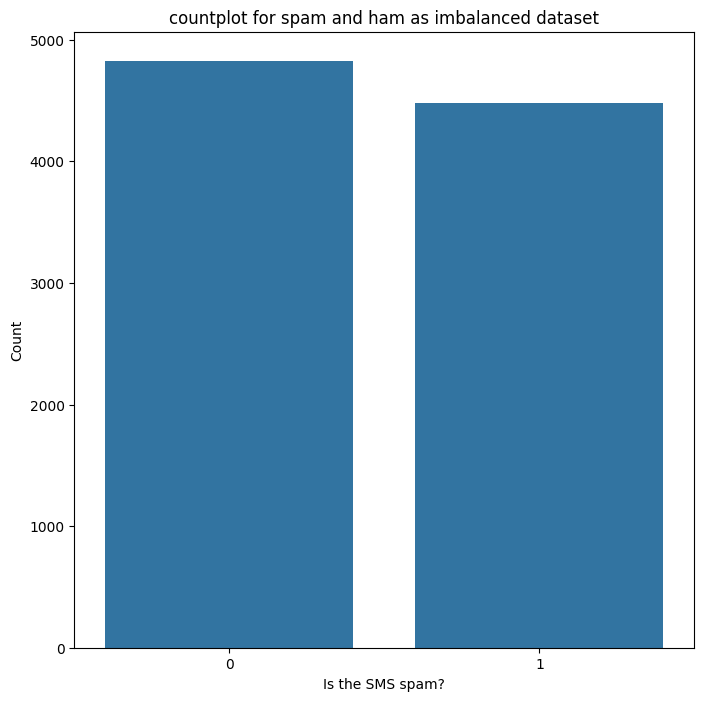

In [12]:
#countplot for spam and ham as imbalanced dataset 
plt.figure(figsize = (8,8))
g = sns.countplot(x = "label", data = dataset)
p = plt.title('countplot for spam and ham as imbalanced dataset')
p = plt.xlabel('Is the SMS spam?')
p = plt.ylabel('Count')

In [13]:
#creating new feature word count
dataset['word_count'] = dataset['message'].apply(lambda x:(len(x.split())))

In [14]:
dataset

,label,message,word_count
0,0,"Go until jurong point, crazy.. Available only ...",20
1,0,Ok lar... Joking wif u oni...,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,0,U dun say so early hor... U c already then say...,11
4,0,"Nah I don't think he goes to usf, he lives aro...",13
...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28


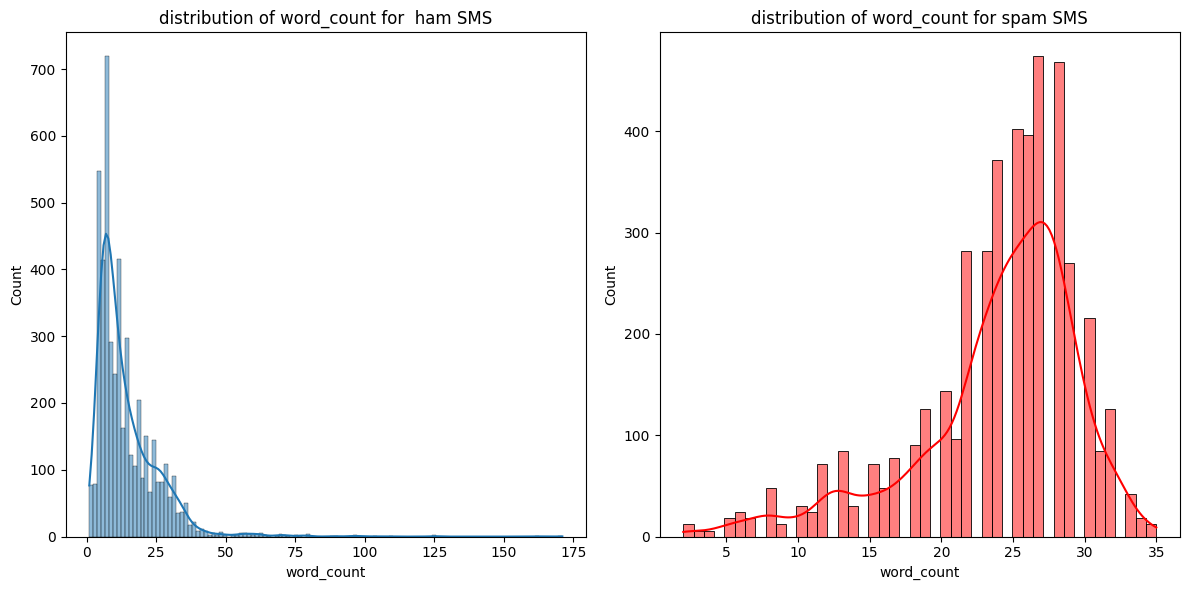

In [15]:
plt.figure(figsize=(12,6))
#(1,1)
plt.subplot(1,2,1)
g = sns.histplot(dataset[dataset["label"]==0].word_count , kde = True)
p = plt.title('distribution of word_count for  ham SMS')

#(1,2)
plt.subplot(1,2,2)
g = sns.histplot(dataset[dataset["label"]==1].word_count,color = "red",  kde = True)
p = plt.title('distribution of word_count for spam SMS')

plt.tight_layout()
plt.show()

In [16]:
#creating new feature of containing currency symbol
def currency(data):
    currency_symbols = ['€','$','¥','£', '₹' ]
    for i in currency_symbols:
        if i in data:
            return 1
    return 0


In [17]:
dataset['contains_currency_symbol']=dataset["message"].apply(currency)
dataset

,label,message,word_count,contains_currency_symbol
0,0,"Go until jurong point, crazy.. Available only ...",20,0
1,0,Ok lar... Joking wif u oni...,6,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0
3,0,U dun say so early hor... U c already then say...,11,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0
...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0


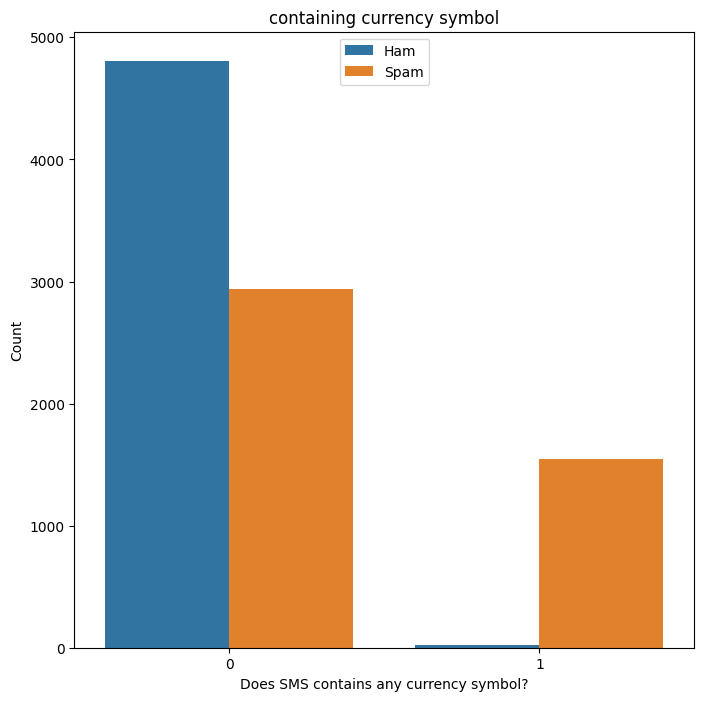

In [18]:
#countplot for contains_currencY_symbol
plt.figure(figsize=(8,8))
g = sns.countplot(x = 'contains_currency_symbol', data = dataset, hue = "label")
p = plt.title("containing currency symbol")
p = plt.xlabel("Does SMS contains any currency symbol?")
p = plt.ylabel("Count")
p = plt.legend(labels = ["Ham", "Spam"], loc = 9)

In [19]:
#Creating new feature of containg numbers
def number(data):
    for i in data:
        if ord(i)>=48 and ord(i)<57:
            return 1
    return 0




In [20]:
dataset["contains_number"] = dataset["message"].apply(number)
dataset

,label,message,word_count,contains_currency_symbol,contains_number
0,0,"Go until jurong point, crazy.. Available only ...",20,0,0
1,0,Ok lar... Joking wif u oni...,6,0,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0,1
3,0,U dun say so early hor... U c already then say...,11,0,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0,0
...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0,1
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1,1
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0,1
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0,1


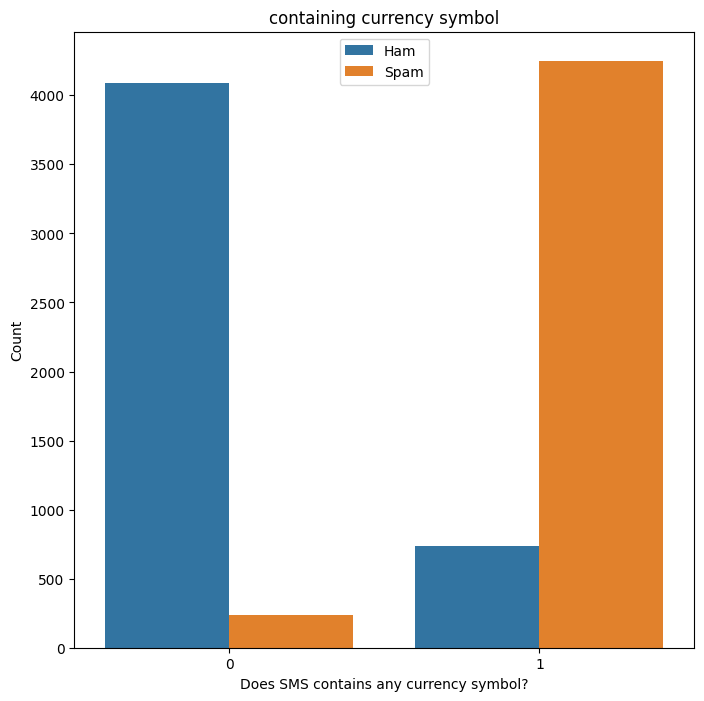

In [21]:
#countplot for containing numbers
plt.figure(figsize=(8,8))
g = sns.countplot(x = 'contains_number', data = dataset, hue = "label")
p = plt.title("containing currency symbol")
p = plt.xlabel("Does SMS contains any currency symbol?")
p = plt.ylabel("Count")
p = plt.legend(labels = ["Ham", "Spam"], loc = 9)

In [22]:
#Data Cleaning
import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\titvi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\titvi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [23]:
corpus = []
wnl = WordNetLemmatizer()

# Ensure stopwords are loaded once
stopwords_set = set(stopwords.words('english'))

# Iterate over messages
for sms in dataset['message']:
    if not isinstance(sms, str):
        sms = ""  # Handle non-string values

    # Cleaning the message
    message = re.sub('[^a-zA-Z]', ' ', sms)
    message = message.lower()
    words = message.split()

    # Removing stopwords
    filterWords = [word for word in words if word not in stopwords_set]

    # Lemmatizing words
    lemmwords = [wnl.lemmatize(word) for word in filterWords]

    # Joining words back
    processed_message = ' '.join(lemmwords)
    corpus.append(processed_message)


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer with a max feature limit of 500
tfidf = TfidfVectorizer(max_features=500)

# Fit and transform the corpus into a TF-IDF matrix
vectors = tfidf.fit_transform(corpus).toarray()

# Get the feature names (column names for the matrix)
feature_name = tfidf.get_feature_names_out()


In [25]:
X = pd.DataFrame(vectors, columns = feature_name)
y = dataset['label']

In [26]:
from sklearn.model_selection import cross_val_score , train_test_split
from sklearn.metrics import classification_report, confusion_matrix


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state=42)

In [28]:
#Naive bayes Model 
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
cv = cross_val_score(mnb, X,y, scoring = 'f1', cv =10)

In [29]:
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)


In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1195
           1       0.94      0.94      0.94      1132

    accuracy                           0.94      2327
   macro avg       0.94      0.94      0.94      2327
weighted avg       0.94      0.94      0.94      2327



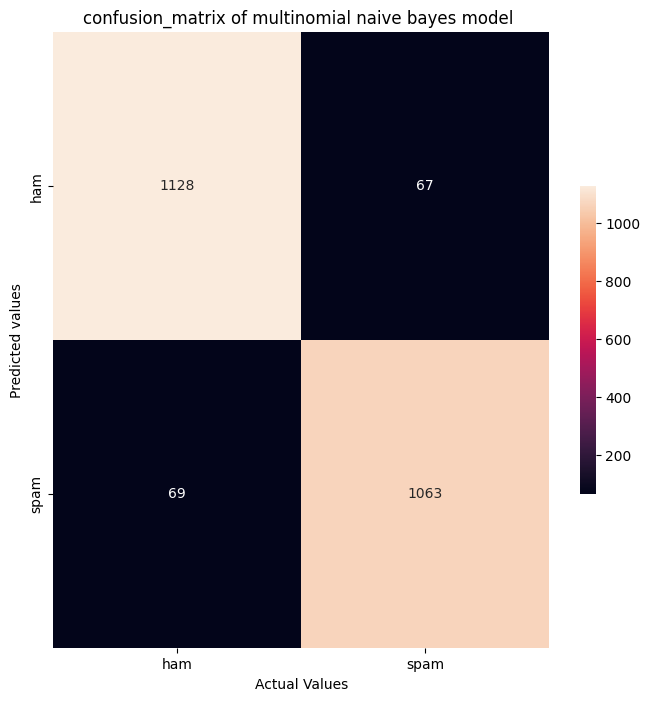

In [31]:
cm = confusion_matrix(y_test, y_pred)
axis_labels = ['ham','spam']
plt.figure(figsize=(8,8))
g = sns.heatmap(data= cm , xticklabels = axis_labels, yticklabels= axis_labels, annot = True, fmt = 'g', cbar_kws = {"shrink":0.5})
p = plt.title("confusion_matrix of multinomial naive bayes model ")
p = plt.xlabel("Actual Values")
p = plt.ylabel("Predicted values")

In [32]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
cv1 = cross_val_score(dt,X,y,scoring = 'f1', cv = 10)
print(round(cv1.mean(),3))
print(round(cv1.std(),3))

0.981
0.004


In [33]:
dt.fit(X_train, y_train)
y_pred1 = dt.predict(X_test)
print(classification_report(y_test,y_pred1))


              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1195
           1       0.97      0.99      0.98      1132

    accuracy                           0.98      2327
   macro avg       0.98      0.98      0.98      2327
weighted avg       0.98      0.98      0.98      2327



In [ ]:
cm = confusion_matrix(y_test,y_pred1)
cm

In [ ]:
cm = confusion_matrix(y_test, y_pred)
axis_labels = ['ham','spam']
plt.figure(figsize=(8,8))
g = sns.heatmap(data= cm , xticklabels = axis_labels, yticklabels= axis_labels, annot = True, fmt = 'g', cbar_kws = {"shrink":0.5})
p = plt.title("confusion_matrix of multinomial naive bayes model ")
p = plt.xlabel("Actual Values")
p = plt.ylabel("Predicted values")

In [55]:
def predict_spam(sms):
    message = re.sub(pattern = '[^a-zA-Z]', repl = ' ', string = sms)
    message = message.lower()
    words = message.split()
    filterWords = [word for word in words if word not in set(stopwords.words('english'))]
    lemmwords = [wnl.lemmatize(word) for word in filterWords]
    message = ' '.join(lemmwords)
    temp = tfidf.transform([message]).toarray()
    return mnb.predict(temp)

In [ ]:
Sample = "Do not answer calls from unknown international numbers as they can be scams! Never call back on missed calls from unknown international numbers as it may lead to high call charges. Please note, if the phone number starts with a country code other than, then it is an international number. For more tips on staying safe, click dit card or loan "
if predict_spam(Sample):
    print("Gotcha!, THIS IS SPAM SMS.")
else:
    print("This is ham message")